# Simple regression


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import norm

from empiricaldist import Pmf, Cdf


from scipy.stats import linregress
from scipy import stats


In [5]:

brfss = pd.read_hdf('../datasets/brfss.hdf5','brfss')


In [ ]:
s

In [15]:
xs = np.linspace(-1, 1)
ys = xs**2
ys += np.random.normal(0, 0.05, len(xs))
np.corrcoef(xs, ys)

array([[1.        , 0.02617951],
       [0.02617951, 1.        ]])

In [17]:
res = linregress(xs, ys)
print(res)

LinregressResult(slope=0.013668590952928123, intercept=0.35337104463489893, rvalue=0.02617951315635399, pvalue=0.8567868844739817, stderr=0.07533428760534332, intercept_stderr=0.04437303214678425)


In [18]:
xs

array([-1.        , -0.95918367, -0.91836735, -0.87755102, -0.83673469,
       -0.79591837, -0.75510204, -0.71428571, -0.67346939, -0.63265306,
       -0.59183673, -0.55102041, -0.51020408, -0.46938776, -0.42857143,
       -0.3877551 , -0.34693878, -0.30612245, -0.26530612, -0.2244898 ,
       -0.18367347, -0.14285714, -0.10204082, -0.06122449, -0.02040816,
        0.02040816,  0.06122449,  0.10204082,  0.14285714,  0.18367347,
        0.2244898 ,  0.26530612,  0.30612245,  0.34693878,  0.3877551 ,
        0.42857143,  0.46938776,  0.51020408,  0.55102041,  0.59183673,
        0.63265306,  0.67346939,  0.71428571,  0.75510204,  0.79591837,
        0.83673469,  0.87755102,  0.91836735,  0.95918367,  1.        ])

In [42]:
#### start
a=[np.arange(1,101)]
a=np.array(a)
b=[np.arange(1,101)]
b=np.array(b)*2


In [43]:
a

array([[  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
         14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
         27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
         40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
         53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
         66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
         79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
         92,  93,  94,  95,  96,  97,  98,  99, 100]])

In [44]:
b

array([[  2,   4,   6,   8,  10,  12,  14,  16,  18,  20,  22,  24,  26,
         28,  30,  32,  34,  36,  38,  40,  42,  44,  46,  48,  50,  52,
         54,  56,  58,  60,  62,  64,  66,  68,  70,  72,  74,  76,  78,
         80,  82,  84,  86,  88,  90,  92,  94,  96,  98, 100, 102, 104,
        106, 108, 110, 112, 114, 116, 118, 120, 122, 124, 126, 128, 130,
        132, 134, 136, 138, 140, 142, 144, 146, 148, 150, 152, 154, 156,
        158, 160, 162, 164, 166, 168, 170, 172, 174, 176, 178, 180, 182,
        184, 186, 188, 190, 192, 194, 196, 198, 200]])

In [45]:
re=linregress(a,b)
re

LinregressResult(slope=2.0, intercept=0.0, rvalue=1.0, pvalue=nan, stderr=-0.0, intercept_stderr=-0.0)

In [46]:
b=b+3

In [47]:
re=linregress(a,b)
re

LinregressResult(slope=2.0, intercept=3.0, rvalue=1.0, pvalue=nan, stderr=-0.0, intercept_stderr=-0.0)

In [49]:
####### end

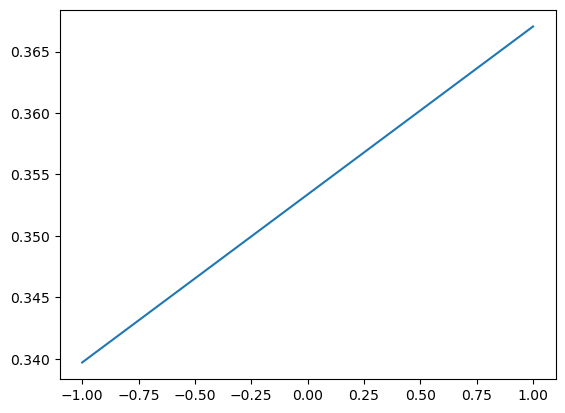

In [50]:
fx = np.array([xs.min(), xs.max()])
fy = res.intercept + res.slope * fx
plt.plot(fx, fy,'-')

In [51]:
subset = brfss.dropna(subset=['WTKG3','HTM4'])

In [52]:
xs = subset['HTM4']
ys = subset['WTKG3']
res = linregress(xs, ys)

In [53]:
res

LinregressResult(slope=0.9192115381848297, intercept=-75.12704250330233, rvalue=0.47420308979024584, pvalue=0.0, stderr=0.005632863769802998, intercept_stderr=0.9608860265433182)

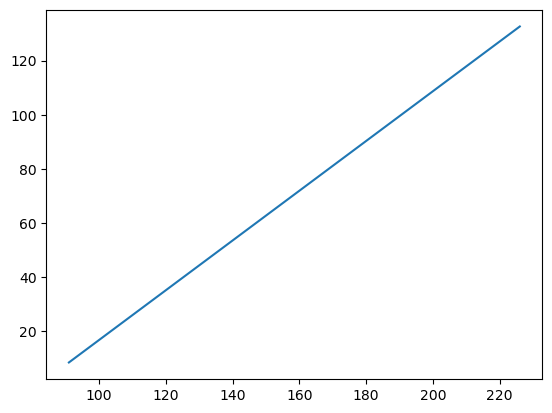

In [54]:
fx = np.array([xs.min(), xs.max()])
fy = res.intercept + res.slope * fx
plt.plot(fx, fy,'-')

### 8.Income and vegetables


In [55]:
from scipy.stats import linregress

# Extract the variables
subset = brfss.dropna(subset=['INCOME2', '_VEGESU1'])
xs = subset['INCOME2']
ys = subset['_VEGESU1']

# Compute the linear regression
res = linregress(xs, ys)
print(res)

LinregressResult(slope=0.06988048092105006, intercept=1.5287786243363113, rvalue=0.11967005884864092, pvalue=1.378503916249654e-238, stderr=0.0021109763563323305, intercept_stderr=0.013196467544093591)


### 9.Fit a line


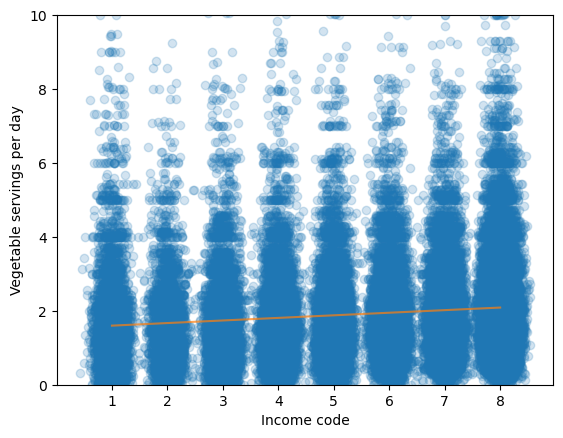

In [56]:
# Plot the scatter plot
plt.clf()
x_jitter = xs + np.random.normal(0, 0.15, len(xs))
plt.plot(x_jitter, ys, 'o', alpha=0.2)

# Plot the line of best fit
fx = np.array([xs.min(), xs.max()])
fy = res.intercept + res.slope * fx
plt.plot(fx, fy, '-', alpha=0.7)

plt.xlabel('Income code')
plt.ylabel('Vegetable servings per day')
plt.ylim([0, 10])
plt.show()